# **INTRODUCCTION AND OBJECTIVE OF THIS NOTEBOOK**

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

## 2. Load and Exploratory Data Analysis (EDA)

* Load the dataset
* Descriptive summary (.describe(), .info())
* Visualization of missing values
* Histograms, bar plots, and box plots to understand the distribution and relationships between features

### 2.1 Load the dataset

In [2]:
ruta_archivo = '/kaggle/input/hotel-booking-demand/hotel_bookings.csv'
df_hotel_booking = pd.read_csv(ruta_archivo)
pd.set_option('display.max_columns', None)

### 2.2 Descriptive summary

In [3]:
df_hotel_booking.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [4]:
df_hotel_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### 2.3 Visualization of missing values

In [5]:
df_hotel_booking.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### 3.3 Histograms

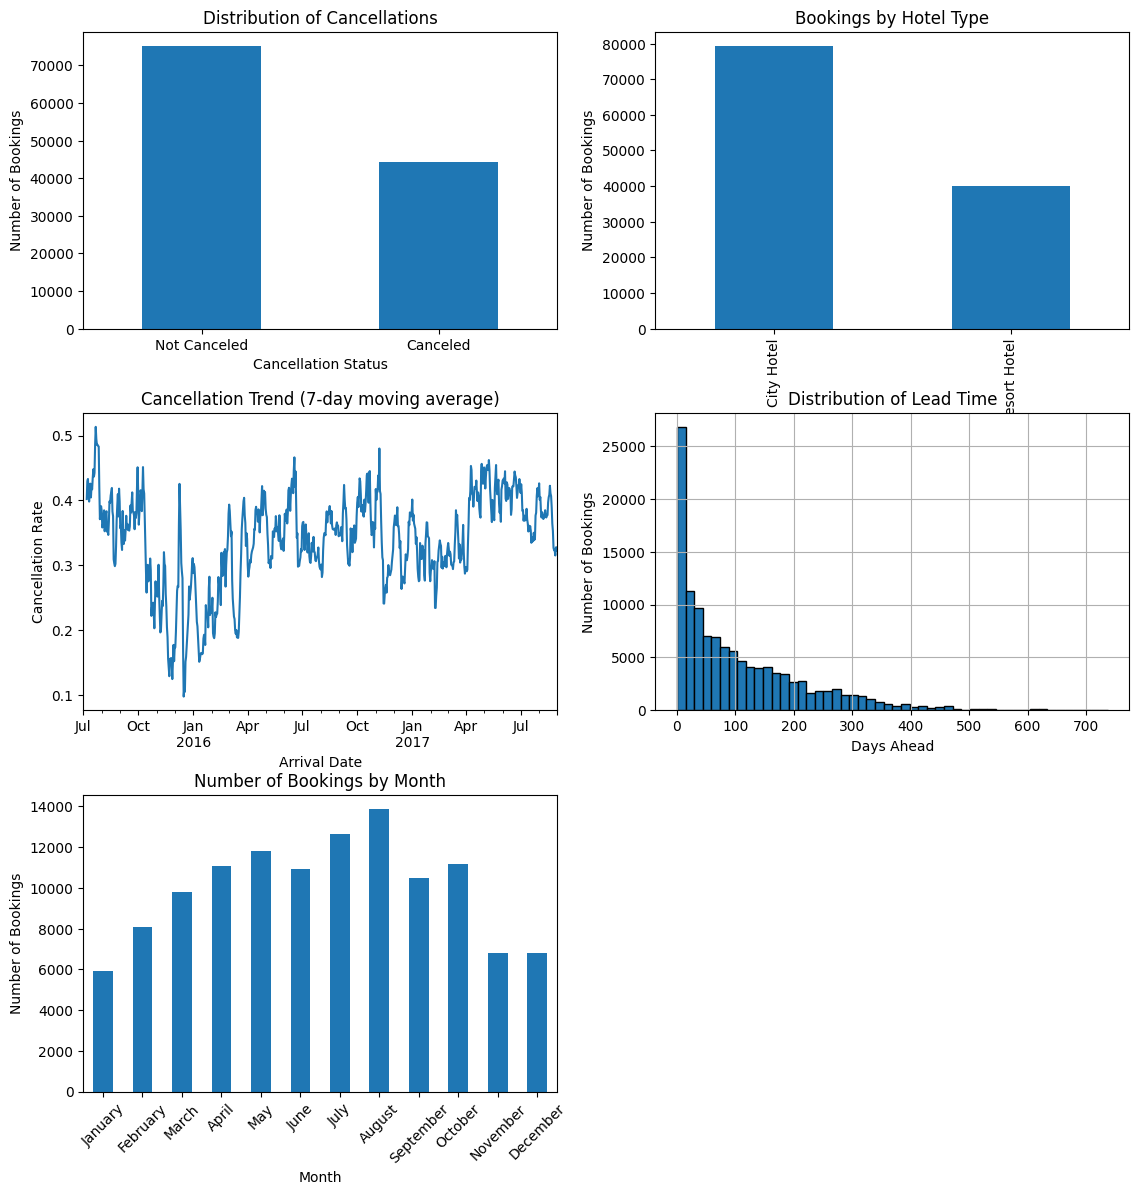

In [6]:
# Create the 'arrival_date' column
df_hotel_booking['arrival_date'] = df_hotel_booking['arrival_date_year'].astype(str) + '-' + df_hotel_booking['arrival_date_month'] + '-' + df_hotel_booking['arrival_date_day_of_month'].astype(str)
df_hotel_booking['arrival_date'] = pd.to_datetime(df_hotel_booking['arrival_date'])

# Set up the subplots layout
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.tight_layout(pad=4.0)  # Adjust spacing between plots

# 1. Distribution of cancellations
df_hotel_booking['is_canceled'].value_counts().plot(kind='bar', ax=axes[0,0], title='Distribution of Cancellations')
axes[0,0].set_xticks([0,1])
axes[0,0].set_xticklabels(['Not Canceled', 'Canceled'], rotation=0)
axes[0,0].set_xlabel('Cancellation Status')
axes[0,0].set_ylabel('Number of Bookings')

# 2. Number of bookings per hotel type
df_hotel_booking['hotel'].value_counts().plot(kind='bar', ax=axes[0,1], title='Bookings by Hotel Type')
axes[0,1].set_xlabel('Hotel Type')
axes[0,1].set_ylabel('Number of Bookings')

# 3. Trend of cancellations over time
df_hotel_booking.groupby(['arrival_date'])['is_canceled'].mean().rolling(window=7).mean().plot(ax=axes[1,0], title='Cancellation Trend (7-day moving average)')
axes[1,0].set_xlabel('Arrival Date')
axes[1,0].set_ylabel('Cancellation Rate')

# 4. Distribution of lead time
df_hotel_booking['lead_time'].hist(bins=50, edgecolor='black', ax=axes[1,1])
axes[1,1].set_title('Distribution of Lead Time')
axes[1,1].set_xlabel('Days Ahead')
axes[1,1].set_ylabel('Number of Bookings')

# 5. Number of bookings per month
df_hotel_booking['arrival_date_month'].value_counts().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']).plot(kind='bar', ax=axes[2,0], title='Number of Bookings by Month')
axes[2,0].set_xlabel('Month')
axes[2,0].set_ylabel('Number of Bookings')
axes[2,0].tick_params(axis='x', rotation=45)

# Remove the unused subplot
axes[2,1].axis('off')

plt.show()

### 3.3.2 Visualizations for Cancelled Reservations

<function matplotlib.pyplot.show(close=None, block=None)>

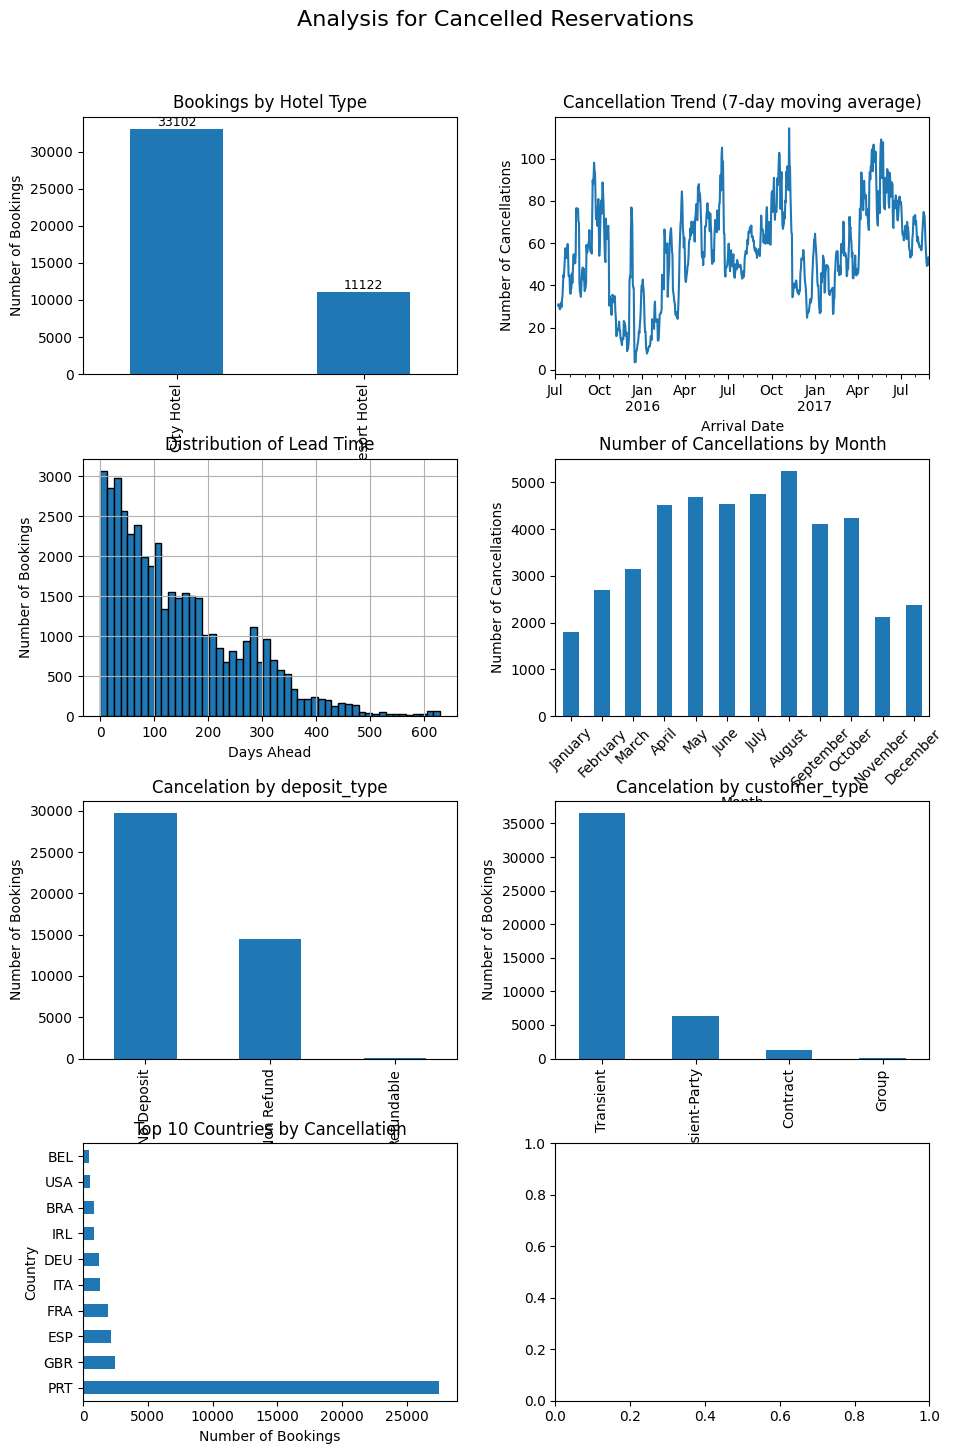

In [7]:
# Filter the dataframe for cancelled reservations
df_cancelled = df_hotel_booking[df_hotel_booking['is_canceled'] == 1]

# Set up the subplots layout for cancelled reservations
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 15))
fig.suptitle('Analysis for Cancelled Reservations', fontsize=16)
fig.tight_layout(pad=4.0, rect=[0, 0, 1, 1])  # Adjust spacing

# Distribution by hotel type
df_cancelled['hotel'].value_counts().plot(kind='bar', ax=axes[0,0], title='Bookings by Hotel Type')
axes[0,0].set_xlabel('Hotel Type')
axes[0,0].set_ylabel('Number of Bookings')

for i, v in enumerate(df_cancelled['hotel'].value_counts()):
    axes[0,0].text(i, v + 10, int(v), ha='center', va='bottom', fontsize=9)

# Trend of cancellations over time
df_cancelled.groupby(['arrival_date'])['is_canceled'].count().rolling(window=7).mean().plot(ax=axes[0,1], title='Cancellation Trend (7-day moving average)')
axes[0,1].set_xlabel('Arrival Date')
axes[0,1].set_ylabel('Number of Cancellations')

# Distribution of lead time
df_cancelled['lead_time'].hist(bins=50, edgecolor='black', ax=axes[1,0])
axes[1,0].set_title('Distribution of Lead Time')
axes[1,0].set_xlabel('Days Ahead')
axes[1,0].set_ylabel('Number of Bookings')

# Bookings per month
df_cancelled['arrival_date_month'].value_counts().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']).plot(kind='bar', ax=axes[1,1], title='Number of Cancellations by Month')
axes[1,1].set_xlabel('Month')
axes[1,1].set_ylabel('Number of Cancellations')
axes[1,1].tick_params(axis='x', rotation=45)


# Bookings per deposit_type
df_cancelled['deposit_type'].value_counts().plot(kind='bar', ax=axes[2,0], title='Cancelation by deposit_type')
axes[2,0].set_xlabel('deposit_type')
axes[2,0].set_ylabel('Number of Bookings')


# Bookings per customer_type
df_cancelled['customer_type'].value_counts().plot(kind='bar', ax=axes[2,1], title='Cancelation by customer_type')
axes[2,1].set_xlabel('customer_type')
axes[2,1].set_ylabel('Number of Bookings')


df_cancelled['country'].value_counts().head(10).plot(kind='barh', ax=axes[3,0], title='Top 10 Countries by Cancellation')
axes[3,0].set_ylabel('Country')
axes[3,0].set_xlabel('Number of Bookings')


plt.show

### 3.3.3 Visualizations for Non-Cancelled Reservations

<function matplotlib.pyplot.show(close=None, block=None)>

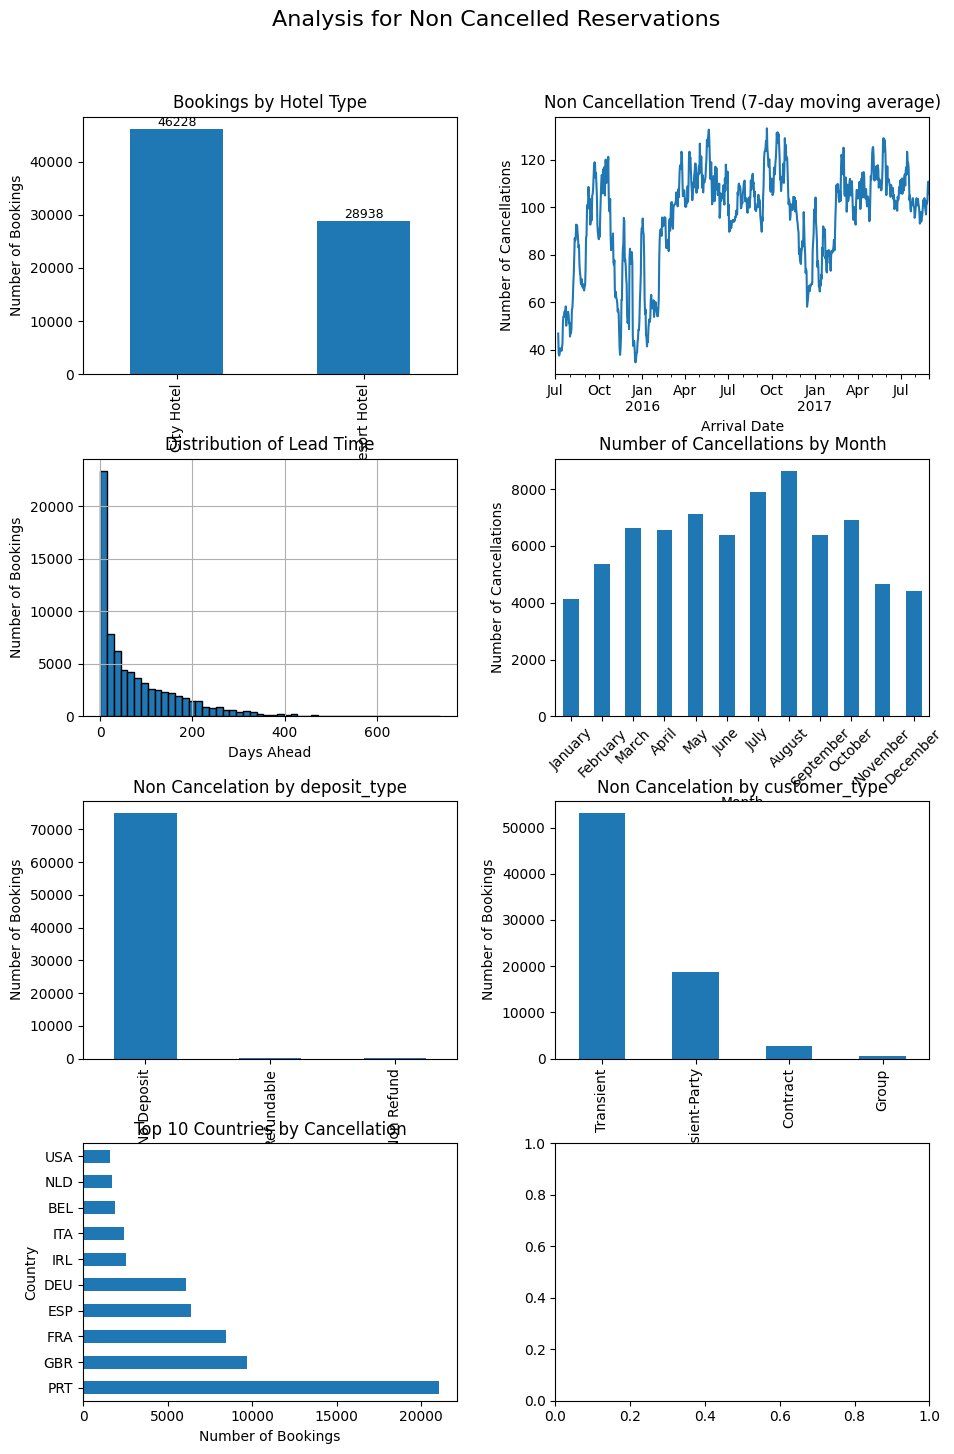

In [8]:
# Filter the dataframe for cancelled reservations
df_not_cancelled = df_hotel_booking[df_hotel_booking['is_canceled'] == 0]

# Set up the subplots layout for cancelled reservations
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 15))
fig.suptitle('Analysis for Non Cancelled Reservations', fontsize=16)
fig.tight_layout(pad=4.0, rect=[0, 0, 1, 1])  # Adjust spacing

# Distribution by hotel type
df_not_cancelled['hotel'].value_counts().plot(kind='bar', ax=axes[0,0], title='Bookings by Hotel Type')
axes[0,0].set_xlabel('Hotel Type')
axes[0,0].set_ylabel('Number of Bookings')

for i, v in enumerate(df_not_cancelled['hotel'].value_counts()):
    axes[0,0].text(i, v + 10, int(v), ha='center', va='bottom', fontsize=9)

# Trend of cancellations over time
df_not_cancelled.groupby(['arrival_date'])['is_canceled'].count().rolling(window=7).mean().plot(ax=axes[0,1], title='Non Cancellation Trend (7-day moving average)')
axes[0,1].set_xlabel('Arrival Date')
axes[0,1].set_ylabel('Number of Cancellations')

# Distribution of lead time
df_not_cancelled['lead_time'].hist(bins=50, edgecolor='black', ax=axes[1,0])
axes[1,0].set_title('Distribution of Lead Time')
axes[1,0].set_xlabel('Days Ahead')
axes[1,0].set_ylabel('Number of Bookings')

# Bookings per month
df_not_cancelled['arrival_date_month'].value_counts().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']).plot(kind='bar', ax=axes[1,1], title='Number of Cancellations by Month')
axes[1,1].set_xlabel('Month')
axes[1,1].set_ylabel('Number of Cancellations')
axes[1,1].tick_params(axis='x', rotation=45)


# Bookings per deposit_type
df_not_cancelled['deposit_type'].value_counts().plot(kind='bar', ax=axes[2,0], title='Non Cancelation by deposit_type')
axes[2,0].set_xlabel('deposit_type')
axes[2,0].set_ylabel('Number of Bookings')


# Bookings per customer_type
df_not_cancelled['customer_type'].value_counts().plot(kind='bar', ax=axes[2,1], title='Non Cancelation by customer_type')
axes[2,1].set_xlabel('customer_type')
axes[2,1].set_ylabel('Number of Bookings')


df_not_cancelled['country'].value_counts().head(10).plot(kind='barh', ax=axes[3,0], title='Top 10 Countries by Cancellation')
axes[3,0].set_ylabel('Country')
axes[3,0].set_xlabel('Number of Bookings')


plt.show

## 4. Preprocessing

We work with the dataframe df_not_cancelled

* Cleaning: Deal with or impute missing values.
* Conversion: Convert categorical variables into numerical (e.g., using pd.get_dummies or LabelEncoder).
* Remove irrelevant or redundant features.
* Scaling: Standard or Min-Max scaling if necessary

### 4.1 Cleaning

In [9]:
# Decisition to delete the followig features

# 1. Eliminar las columnas 'agent' y 'company'
df_not_cancelled.drop(columns=['agent', 'company'], inplace=True)

# 2. Reemplazar NaN en 'children' por 0
df_not_cancelled['children'].fillna(0, inplace=True)

# 3. Reemplazar NaN en 'country' por 'XXX'
df_not_cancelled['country'].fillna('XXX', inplace=True)
df_not_cancelled

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-08-30
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-08-31
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017-08-31
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017-08-31


### 4.1 Cleaning 

We take some actions with the missing data

In [10]:
# Fill missing data

df_hotel_booking['children'] =  df_hotel_booking['children'].fillna(0)
df_hotel_booking['country'] = df_hotel_booking['country'].fillna(df_hotel_booking['country'].mode().index[0])
df_hotel_booking['agent']= df_hotel_booking['agent'].fillna('0')
df_hotel_booking = df_hotel_booking.drop(['company'], axis =1)

df_hotel_booking

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-08-30
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-08-31
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017-08-31
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017-08-31


### 4.1 Categorical conversion


## 5. Feature Selection (Optional)

Use techniques such as feature importance or dimensionality reduction techniques (e.g., PCA).

## 6. Data Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 7. Modeling
* Select one or multiple classification algorithms (e.g., Logistic Regression, Decision Tree, Random Forests, Gradient Boosting, etc.)
* Train the model and validate its performance, possibly using cross-validation.
* Fine-tune hyperparameters if necessary, using techniques like GridSearchCV or RandomizedSearchCV.

## 8. Model evaluation

* Use metrics like accuracy, recall, F1-score, and the confusion matrix.
* (Optional) ROC curve and Area Under the Curve (AUC).

## 9. Interpretation
* If relevant, interpret feature importance for the model.
* Comment on the results and their implications.

## 10. Conclusions and Next Steps
* Summarize key findings.
* Discuss limitations and recommendations for future analyses or implementations.

## 11. Extras (optional):
* Interactive visualizations using libraries like Plotly or Bokeh.
* Implementing advanced techniques like neural networks or advanced ensemble models.
* Conduct a Return on Investment analysis if you have data about the cost of a customer cancellation and the cost of implementing measures to reduce cancellationsInteractive visualizations using libraries like Plotly or Bokeh.
* Implementing advanced techniques like neural networks or advanced ensemble models.
* Conduct a Return on Investment analysis if you have data about the cost of a customer cancellation and the cost of implementing measures to reduce cancellations

* ¿Qué tipo de hotel tiene mayor cantidad de cancelación?
* ¿En qué mes se producen la mayor cantidad de cancelaciones?
* ¿Que porcentaje representa la cancelación respecto del total de reservas?
* ¿Desde que país se producen más cancelaciones?
* ¿Con cuantos días de anticipación se realizan las reservas?


¿Cuál será la tasa de cancelación de las siguientes 3 meses?